# Glasma Results

### We read the files

In [1]:
# We create a list with the files to read

N = 100

file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/temp_gauge/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_50.000000_wy_1.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_6_Nperp_128_Leta_12.271100_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_127/pperp/evolution_Pperp_sq.dat' %n for n in range(N)]

In [2]:
#We read eache file into a dataframe of a list

import pandas as pd 

df_list = []
for i in range(N):
    df = pd.read_table(file_list[i], header = None)
    df_list.append(df)

### We get the average $p_\perp$ as a function of $x^+$

In [3]:
# We compute the average p_perp and the deviation at every time step

import numpy as np 

s = np.zeros((N, len(np.array(df_list[0]))))


for i in range(N):
    arr = np.array(df_list[i])
    xplus = arr[:,0]
    
    
    for j in range(len(arr)):
        s[i, j] = arr[j, 1]
        
p_av = [np.average(s[:,j]) for j in range(len(np.array(df_list[0])))]
p_sigma = [np.std(s[:,j])/np.sqrt(N) for j in range(len(np.array(df_list[0])))]

p_av_p = [np.average(s[:,j])-s[0,0] for j in range(len(np.array(df_list[0])))]
        
print(xplus)
print (p_av)
print (p_sigma)

[ 0.        0.772983  1.54597   2.31895   3.09193   3.86491   4.6379
  5.41088   6.18386   6.95684   7.72983   8.50281   9.27579  10.0488
 10.8218   11.5947  ]
[311.1379999999999, 316.60981000000004, 319.58401, 320.53769, 321.34406, 321.74251999999996, 322.15685, 322.4434, 322.51051, 322.71727000000004, 322.89457000000004, 322.89473999999996, 322.98613, 323.08498, 323.16306000000003, 323.06835]
[5.684341886080802e-15, 0.08017415006721315, 0.12154038381953576, 0.11761403716818844, 0.13729551181302294, 0.15541543261851432, 0.16429764537265917, 0.16470314751090828, 0.14088469079002158, 0.16206409648962933, 0.17563128892939317, 0.17444815253822568, 0.17297644675215193, 0.18942669029468878, 0.18284125290535486, 0.17640971423082114]


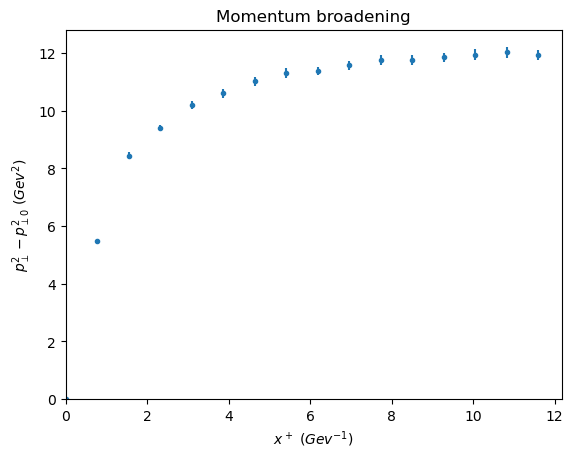

In [7]:
# We plot the results

import matplotlib.pyplot as plt 

plt.errorbar(xplus, p_av_p, p_sigma, fmt = '.')
plt.xlim(left=0); plt.ylim(bottom=0)
plt.xlabel(r'$x^+ \ (Gev^{-1})$'); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (Gev^2)$')
plt.title('Momentum broadening')
plt.savefig('Jets in Glasma Results/temp_gauge/Momentum_broadening.png')

In [8]:
# We save to file

np.savetxt('Jets in Glasma Results/temp_gauge/p_perp2.txt', [xplus, p_av_p, p_sigma], fmt='%f')

### We get the average $\hat{q}$ as a function of $x^+$

In [9]:
# We compute the qhat at every time step

qhat = [(p_av[i]-p_av[i-1])/(xplus[i]-xplus[i-1]) for i in range(1, len(p_av))]
qhat_sigma = [np.sqrt((p_sigma[i]/(xplus[i]-xplus[i-1]))**2 + (p_sigma[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(p_av))]
xplus_q = [xplus[i] for i in range (1, len(p_av))] 

print(qhat)

[7.078823208272522, 3.84767143561268, 1.2337706020854613, 1.043196460451778, 0.515485523558104, 0.5360095214686652, 0.37070816838725085, 0.0868198400993735, 0.26748428161146637, 0.22936907333859743, 0.0002199280704699367, 0.11823074335693894, 0.12787674156863488, 0.1010090556274991, -0.12253849139606741]


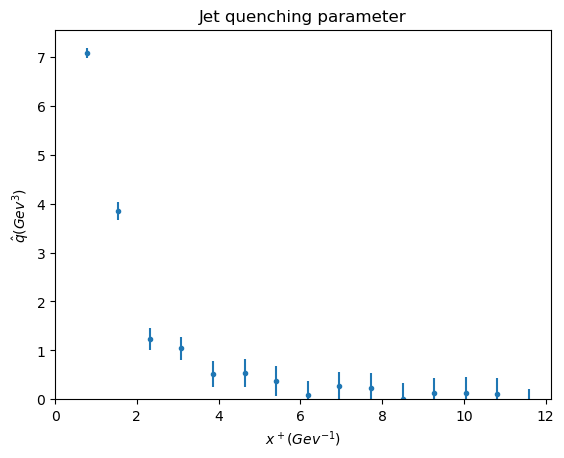

In [10]:
# We plot the results

plt.errorbar(xplus_q, qhat, qhat_sigma, fmt = '.')
plt.xlim(left=0); plt.ylim(bottom=0)
plt.xlabel(r'$x^+ (Gev^{-1})$'); plt.ylabel(r'$\hat{q} (Gev^3)$')
plt.title('Jet quenching parameter')
plt.savefig('Jets in Glasma Results/temp_gauge/qhat.png')

In [11]:
# We save to file

np.savetxt('Jets in Glasma Results/temp_gauge/qhat.txt', [xplus_q, qhat, qhat_sigma], fmt='%f')

### We plot all the widths in the same graph

In [30]:
# We import the data

p1 = np.loadtxt('N=256_lc/p_perp2_wz1.txt'); q1 = np.loadtxt('N=256_lc/qhat_wz1.txt')
p2 = np.loadtxt('N=256_lc/p_perp2_wz5.txt'); q2 = np.loadtxt('N=256_lc/qhat_wz5.txt')
p3 = np.loadtxt('N=256_lc/p_perp2_wz10.txt'); q3 = np.loadtxt('N=256_lc/qhat_wz10.txt')
# p4 = np.loadtxt('N=256_lc/p_perp2_wz15.txt'); q4 = np.loadtxt('N=256_lc/qhat_wz15.txt')
p5 = np.loadtxt('N=256_lc/p_perp2_wz20.txt'); q5 = np.loadtxt('N=256_lc/qhat_wz20.txt')
p6 = np.loadtxt('N=256_lc/p_perp2_wz30.txt'); q6 = np.loadtxt('N=256_lc/qhat_wz30.txt')
p7 = np.loadtxt('N=256_lc/p_perp2_wz40.txt'); q7 = np.loadtxt('N=256_lc/qhat_wz40.txt')
p8 = np.loadtxt('N=256_lc/p_perp2_wz50.txt'); q8 = np.loadtxt('N=256_lc/qhat_wz50.txt')
p9 = np.loadtxt('N=256_lc/p_perp2_wz60.txt'); q9 = np.loadtxt('N=256_lc/qhat_wz60.txt')
# p10 = np.loadtxt('N=256_lc/p_perp2_wz70.txt'); q10 = np.loadtxt('N=256_lc/qhat_wz70.txt')

xplus = p7[0]; xplus_q = q7[0]
p1_dat = p1[1]; p1_sig = p1[2]; q1_dat = q1[1]; q1_sig = q1[2]
p2_dat = p2[1]; p2_sig = p2[2]; q2_dat = q2[1]; q2_sig = q2[2]
p3_dat = p3[1]; p3_sig = p3[2]; q3_dat = q3[1]; q3_sig = q3[2]
# p4_dat = p4[1]; p4_sig = p4[2]; q4_dat = q4[1]; q4_sig = q4[2]
p5_dat = p5[1]; p5_sig = p5[2]; q5_dat = q5[1]; q5_sig = q5[2]
p6_dat = p6[1]; p6_sig = p6[2]; q6_dat = q6[1]; q6_sig = q6[2]
p7_dat = p7[1]; p7_sig = p7[2]; q7_dat = q7[1]; q7_sig = q7[2]
p8_dat = p8[1]; p8_sig = p8[2]; q8_dat = q8[1]; q8_sig = q8[2]
p9_dat = p9[1]; p9_sig = p9[2]; q9_dat = q9[1]; q9_sig = q9[2]
# p10_dat = p10[1]; p10_sig = p10[2]; q10_dat = q10[1]; q10_sig = q10[2]

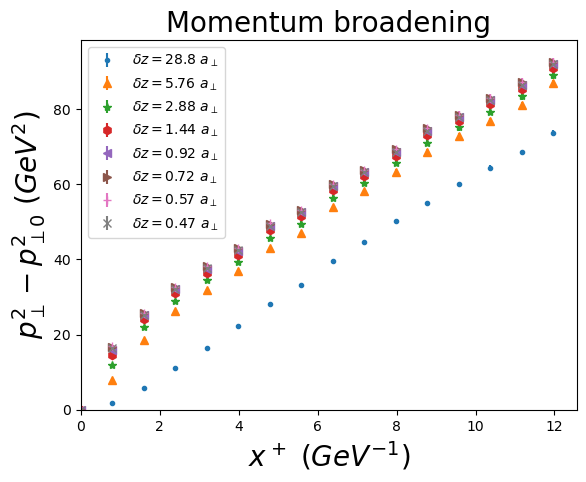

In [31]:
# We plot the results for p_perp

plt.errorbar(xplus, p1_dat, p1_sig, fmt='.', label=r'$\delta z = 28.8\ a_\perp$')
plt.errorbar(xplus, p2_dat, p2_sig, fmt='^', label=r'$\delta z = 5.76\ a_\perp$')
plt.errorbar(xplus, p3_dat, p3_sig, fmt='*', label=r'$\delta z = 2.88\ a_\perp$')
# plt.errorbar(xplus, p4_dat, p4_sig, fmt='s', label=r'$w_z = 15$')
plt.errorbar(xplus, p5_dat, p5_sig, fmt='h', label=r'$\delta z = 1.44\ a_\perp$')
plt.errorbar(xplus, p6_dat, p6_sig, fmt='<', label=r'$\delta z = 0.92\ a_\perp$')
plt.errorbar(xplus, p7_dat, p7_sig, fmt='>', label=r'$\delta z = 0.72\ a_\perp$')
plt.errorbar(xplus, p8_dat, p8_sig, fmt='+', label=r'$\delta z = 0.57\ a_\perp$')
plt.errorbar(xplus, p9_dat, p9_sig, fmt='x', label=r'$\delta z = 0.47\ a_\perp$')
# plt.errorbar(xplus, p10_dat, p10_sig, fmt='d', label=r'$w_z = 70$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening', fontsize=20)

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend(fontsize=10)

plt.savefig('N=256_lc/Momentum_broadening_combined.png', bbox_inches='tight')

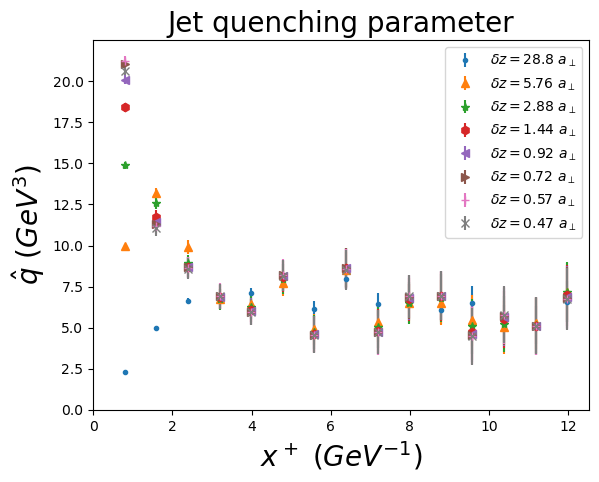

In [32]:
# We plot the results for qhat

plt.errorbar(xplus_q, q1_dat, q1_sig, fmt='.', label=r'$\delta z = 28.8\ a_\perp$')
plt.errorbar(xplus_q, q2_dat, q2_sig, fmt='^', label=r'$\delta z = 5.76\ a_\perp$')
plt.errorbar(xplus_q, q3_dat, q3_sig, fmt='*', label=r'$\delta z = 2.88\ a_\perp$')
# plt.errorbar(xplus_q, q4_dat, q4_sig, fmt='s', label=r'$w_z = 15$')
plt.errorbar(xplus_q, q5_dat, q5_sig, fmt='h', label=r'$\delta z = 1.44\ a_\perp$')
plt.errorbar(xplus_q, q6_dat, q6_sig, fmt='<', label=r'$\delta z = 0.92\ a_\perp$')
plt.errorbar(xplus_q, q7_dat, q7_sig, fmt='>', label=r'$\delta z = 0.72\ a_\perp$')
plt.errorbar(xplus_q, q8_dat, q8_sig, fmt='+', label=r'$\delta z = 0.57\ a_\perp$')
plt.errorbar(xplus_q, q9_dat, q9_sig, fmt='x', label=r'$\delta z = 0.47\ a_\perp$')
# plt.errorbar(xplus_q, q10_dat, q10_sig, fmt='d', label=r'$w_z = 70$')

plt.xlabel(r'$x^+\ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q}\ (GeV^3)$', fontsize=20)
plt.title('Jet quenching parameter', fontsize=20)

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend(fontsize=10)

plt.savefig('N=256_lc/qhat_combined.png', bbox_inches='tight')

### We check how the number of lattice points influences the results of the different widths

We compare for the value of wz where convergence is reached at every N

In [13]:
# We load the desired width

p_64 = np.loadtxt('N=64_lc/p_perp2_wz10.txt'); q_64 = np.loadtxt('N=64_lc/qhat_wz10.txt')
p_128 = np.loadtxt('N=128_lc/p_perp2_wz20.txt'); q_128 = np.loadtxt('N=128_lc/qhat_wz20.txt')
p_256 = np.loadtxt('N=256_lc/p_perp2_wz40.txt'); q_256 = np.loadtxt('N=256_lc/qhat_wz40.txt')



xplus = p_128[0]; xplus_q = q_128[0]
p_64_dat = p_64[1]; p_64_sig = p_64[2]; q_64_dat = q_64[1]; q_64_sig = q_64[2]
p_128_dat = p_128[1]; p_128_sig = p_128[2]; q_128_dat = q_128[1]; q_128_sig = q_128[2]
p_256_dat = p_256[1]; p_256_sig = p_256[2]; q_256_dat = q_256[1]; q_256_sig = q_256[2]

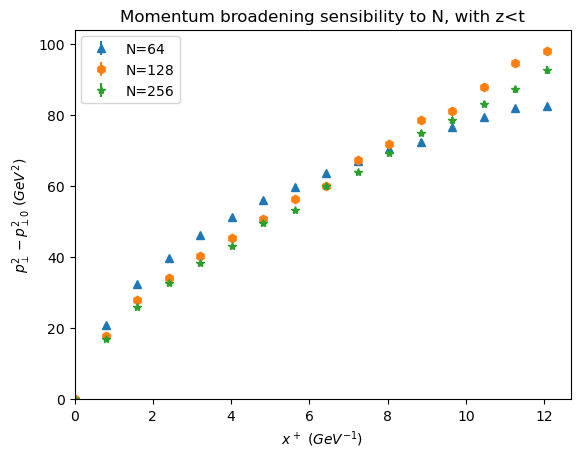

In [14]:
# We plot the momentum broadening

plt.errorbar(xplus, p_64_dat, p_64_sig, fmt='^', label='N=64')
plt.errorbar(xplus, p_128_dat, p_128_sig, fmt='h', label='N=128')
plt.errorbar(xplus, p_256_dat, p_256_sig, fmt='*', label='N=256')

plt.xlabel(r'$x^+ \ (GeV^{-1})$'); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$')
plt.title('Momentum broadening sensibility to N, with z<t')

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend()

plt.savefig('sensibility_to_N/Momentum_broadening_lc.png')

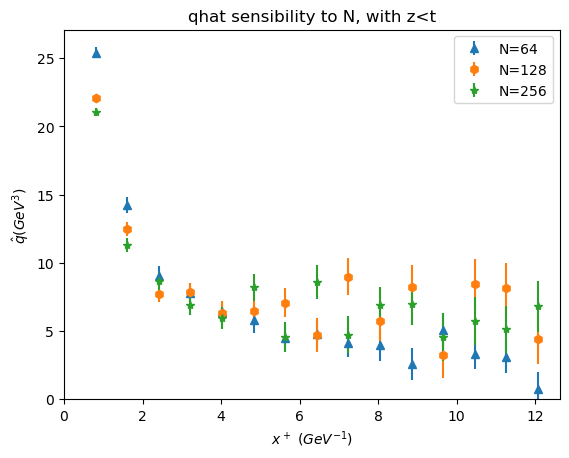

In [15]:
# We plot the qhat

plt.errorbar(xplus_q, q_64_dat, q_64_sig, fmt='^', label='N=64')
plt.errorbar(xplus_q, q_128_dat, q_128_sig, fmt='h', label='N=128')
plt.errorbar(xplus_q, q_256_dat, q_256_sig, fmt='*', label='N=256')


plt.xlabel(r'$x^+ \ (GeV^{-1})$'); plt.ylabel(r'$\hat{q} (GeV^3)$')
plt.title('qhat sensibility to N, with z<t')

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend()

plt.savefig('sensibility_to_N/qhat_lc.png')

### We check if varying wy influences the results

In [16]:
p_nowy = np.loadtxt('N=128_lc/p_perp2_wz40.txt'); q_nowy = np.loadtxt('N=128_lc/qhat_wz40.txt')
p_wy = np.loadtxt('N=128_lc_changewy/p_perp2_wz40.txt'); q_wy = np.loadtxt('N=128_lc_changewy/qhat_wz40.txt')

xplus = p_nowy[0]; xplus_q = q_nowy[0]
p_nowy_dat = p_nowy[1]; p_nowy_sig = p_nowy[2]; q_nowy_dat = q_nowy[1]; q_nowy_sig = q_nowy[2]
p_wy_dat = p_wy[1]; p_wy_sig = p_wy[2]; q_wy_dat = q_wy[1]; q_wy_sig = q_wy[2]

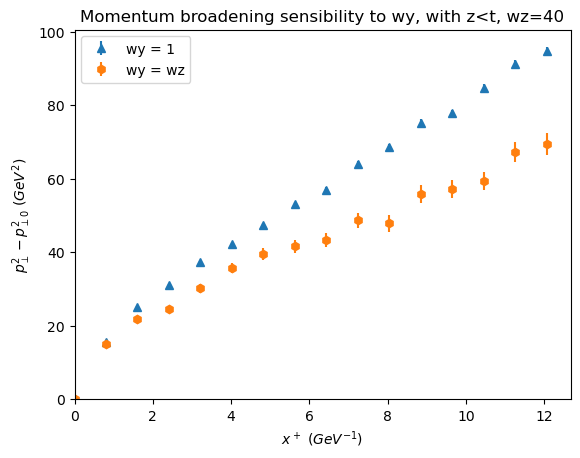

In [17]:
# We plot the momentum broadening

plt.errorbar(xplus, p_nowy_dat, p_nowy_sig, fmt='^', label='wy = 1')
plt.errorbar(xplus, p_wy_dat, p_wy_sig, fmt='h', label='wy = wz')

plt.xlabel(r'$x^+ \ (GeV^{-1})$'); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$')
plt.title('Momentum broadening sensibility to wy, with z<t, wz=40')

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend()

plt.savefig('sensibility_to_wy/Momentum_broadening_lc_wz=40.png')

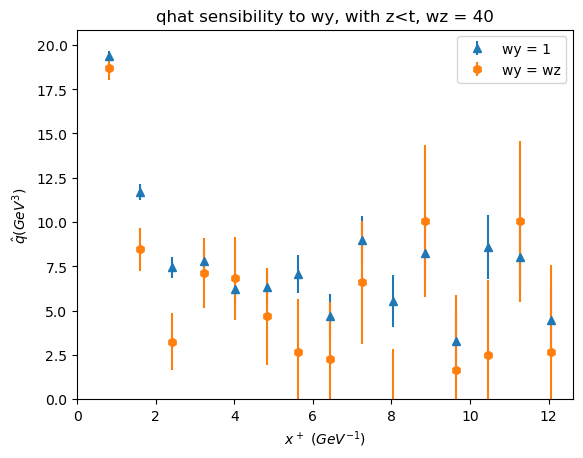

In [18]:
# We plot the qhat

plt.errorbar(xplus_q, q_nowy_dat, q_nowy_sig, fmt='^', label='wy = 1')
plt.errorbar(xplus_q, q_wy_dat, q_wy_sig, fmt='h', label='wy = wz')


plt.xlabel(r'$x^+ \ (GeV^{-1})$'); plt.ylabel(r'$\hat{q} (GeV^3)$')
plt.title('qhat sensibility to wy, with z<t, wz = 40')

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend()

plt.savefig('sensibility_to_wy/qhat_lc_wz40.png')

### We check the sensibility to z < t for N=256

In [19]:
p_lc = np.loadtxt('N=256_lc/p_perp2_wz50.txt'); q_lc = np.loadtxt('N=256_lc/qhat_wz50.txt')
p_nolc = np.loadtxt('N=256_nolc/p_perp2_wz50.txt'); q_nolc = np.loadtxt('N=256_nolc/qhat_wz50.txt')

xplus = p_lc[0]; xplus_q = q_lc[0]
p_lc_dat = p_lc[1]; p_lc_sig = p_lc[2]; q_lc_dat = q_lc[1]; q_lc_sig = q_lc[2]
p_nolc_dat = p_nolc[1]; p_nolc_sig = p_nolc[2]; q_nolc_dat = q_nolc[1]; q_nolc_sig = q_nolc[2]

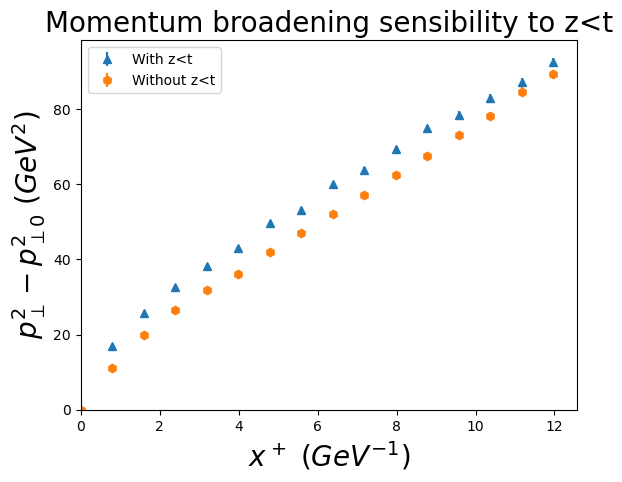

In [20]:
# We plot the momentum broadening

plt.errorbar(xplus, p_lc_dat, p_lc_sig, fmt='^', label='With z<t')
plt.errorbar(xplus, p_nolc_dat, p_nolc_sig, fmt='h', label='Without z<t')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening sensibility to z<t', fontsize=20)

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend()

plt.savefig('sensibility_to_lc/Momentum_broadening.png', bbox_inches='tight')

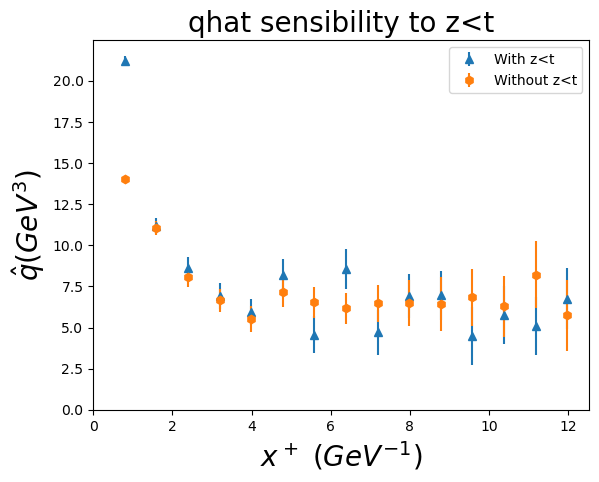

In [21]:
# We plot the qhat

plt.errorbar(xplus_q, q_lc_dat, q_lc_sig, fmt='^', label='With z<t')
plt.errorbar(xplus_q, q_nolc_dat, q_nolc_sig, fmt='h', label='Without z<t')


plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} (GeV^3)$', fontsize=20)
plt.title('qhat sensibility to z<t', fontsize=20)

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend()

plt.savefig('sensibility_to_lc/qhat.png', bbox_inches='tight')

### We plot the initial behavior

In [22]:
# We create a list with the files to read

N = 100

file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/init_nolc/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_60.000000_wy_1.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_6_Nperp_128_Leta_1.464800_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_15/pperp/evolution_Pperp_sq.dat' %n for n in range(N)]

In [23]:
#We read eache file into a dataframe of a list

import pandas as pd 

df_list = []
for i in range(N):
    df = pd.read_table(file_list[i], header = None)
    df_list.append(df)

In [24]:
# We compute the average p_perp and the deviation at every time step

import numpy as np 

s = np.zeros((N, len(np.array(df_list[0]))))


for i in range(N):
    arr = np.array(df_list[i])
    xplus = arr[:,0]
    
    
    for j in range(len(arr)):
        s[i, j] = arr[j, 1]
        
p_av = [np.average(s[:,j]) for j in range(len(np.array(df_list[0])))]
p_sigma = [np.std(s[:,j])/np.sqrt(N) for j in range(len(np.array(df_list[0])))]

p_av_p = [np.average(s[:,j])-s[0,0] for j in range(len(np.array(df_list[0])))]
        
print (p_av)
print (p_sigma)

[431.55299999999994, 435.17303999999996, 436.01667000000003, 436.606, 437.37640999999996, 438.46759999999995, 439.82338000000004, 441.283, 442.72251000000006, 444.10076999999995, 445.39166, 446.56845999999996, 447.63901999999996, 448.56521, 449.44617]
[5.684341886080802e-15, 0.0856865951243248, 0.10164996611411115, 0.11203736876596104, 0.12119734080828645, 0.13257506628321936, 0.14107522658496766, 0.14231649798951632, 0.14460874558269293, 0.15757195172682192, 0.16748763728705474, 0.17438791840032966, 0.1862183052119208, 0.20816019374270395, 0.23045413211960422]


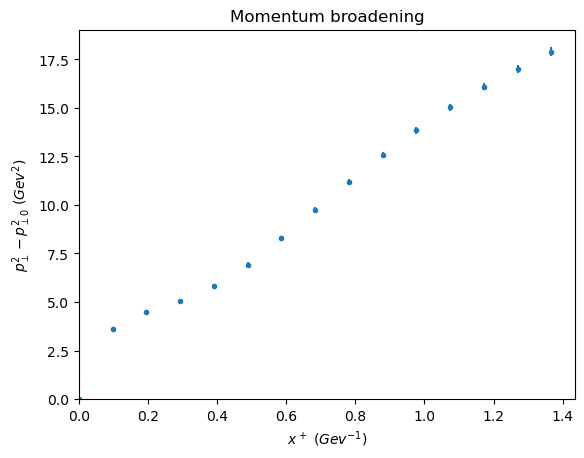

In [25]:
# We plot the results

import matplotlib.pyplot as plt 

plt.errorbar(xplus, p_av_p, p_sigma, fmt = '.')
plt.xlim(left=0); plt.ylim(bottom=0)
plt.xlabel(r'$x^+ \ (Gev^{-1})$'); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (Gev^2)$')
plt.title('Momentum broadening')
plt.savefig('initial/Momentum_broadening_nolc_wz60.png')

In [26]:
# We save to file

np.savetxt('initial/p_perp2_nolc_wz60.txt', [xplus, p_av_p, p_sigma], fmt='%f')

In [27]:
# We compute the qhat at every time step

qhat = [(p_av[i]-p_av[i-1])/(xplus[i]-xplus[i-1]) for i in range(1, len(p_av))]
qhat_sigma = [np.sqrt((p_sigma[i]/(xplus[i]-xplus[i-1]))**2 + (p_sigma[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(p_av))]
xplus_q = [xplus[i] for i in range (1, len(p_av))] 

print(qhat)

[37.070329420511314, 8.638996781484732, 6.034940042804228, 7.889260954604262, 11.174043049951697, 13.883649247847945, 14.947006236367267, 14.74092203084401, 14.113852108997143, 13.219153533430077, 12.050339453392564, 10.963236047107017, 9.48479262672831, 9.020684005734335]


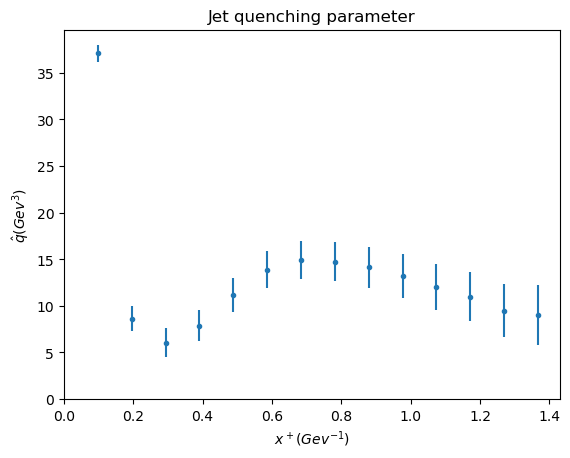

In [28]:
# We plot the results

plt.errorbar(xplus_q, qhat, qhat_sigma, fmt = '.')
plt.xlim(left=0); plt.ylim(bottom=0)
plt.xlabel(r'$x^+ (Gev^{-1})$'); plt.ylabel(r'$\hat{q} (Gev^3)$')
plt.title('Jet quenching parameter')
plt.savefig('initial/qhat_nolc_wz60.png')

In [29]:
# We save to file

np.savetxt('initial/qhat_nolc_wz60.txt', [xplus_q, qhat, qhat_sigma], fmt='%f')

Combined for all the posibilites

In [30]:
# We import the data

p1_lc = np.loadtxt('initial/p_perp2_lc_wz40.txt'); q1_lc = np.loadtxt('initial/qhat_lc_wz40.txt')
p2_lc = np.loadtxt('initial/p_perp2_lc_wz50.txt'); q2_lc = np.loadtxt('initial/qhat_lc_wz50.txt')
p3_lc = np.loadtxt('initial/p_perp2_lc_wz60.txt'); q3_lc = np.loadtxt('initial/qhat_lc_wz60.txt')
p1_nolc = np.loadtxt('initial/p_perp2_nolc_wz40.txt'); q1_nolc = np.loadtxt('initial/qhat_nolc_wz40.txt')
p2_nolc = np.loadtxt('initial/p_perp2_nolc_wz50.txt'); q2_nolc = np.loadtxt('initial/qhat_nolc_wz50.txt')
p3_nolc = np.loadtxt('initial/p_perp2_nolc_wz60.txt'); q3_nolc = np.loadtxt('initial/qhat_nolc_wz60.txt')


xplus = p1_lc[0]; xplus_q = q1_lc[0]
p1_lc_dat = p1_lc[1]; p1_lc_sig = p1_lc[2]; q1_lc_dat = q1_lc[1]; q1_lc_sig = q1_lc[2]
p2_lc_dat = p2_lc[1]; p2_lc_sig = p2_lc[2]; q2_lc_dat = q2_lc[1]; q2_lc_sig = q2_lc[2]
p3_lc_dat = p3_lc[1]; p3_lc_sig = p3_lc[2]; q3_lc_dat = q3_lc[1]; q3_lc_sig = q3_lc[2]
p1_nolc_dat = p1_nolc[1]; p1_nolc_sig = p1_nolc[2]; q1_nolc_dat = q1_nolc[1]; q1_nolc_sig = q1_nolc[2]
p2_nolc_dat = p2_nolc[1]; p2_nolc_sig = p2_nolc[2]; q2_nolc_dat = q2_nolc[1]; q2_nolc_sig = q2_nolc[2]
p3_nolc_dat = p3_nolc[1]; p3_nolc_sig = p3_nolc[2]; q3_nolc_dat = q3_nolc[1]; q3_nolc_sig = q3_nolc[2]


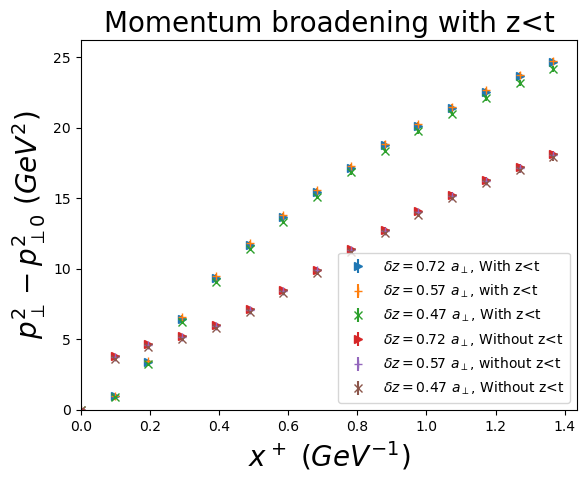

In [31]:
# We plot the results for p_perp

plt.errorbar(xplus, p1_lc_dat, p1_nolc_sig, fmt='>', label=r'$\delta z = 0.72\ a_\perp$, With z<t')
plt.errorbar(xplus, p2_lc_dat, p2_nolc_sig, fmt='+', label=r'$\delta z = 0.57\ a_\perp$, with z<t')
plt.errorbar(xplus, p3_lc_dat, p3_nolc_sig, fmt='x', label=r'$\delta z = 0.47\ a_\perp$, With z<t')
plt.errorbar(xplus, p1_nolc_dat, p1_nolc_sig, fmt='>', label=r'$\delta z = 0.72\ a_\perp$, Without z<t')
plt.errorbar(xplus, p2_nolc_dat, p2_nolc_sig, fmt='+', label=r'$\delta z = 0.57\ a_\perp$, without z<t')
plt.errorbar(xplus, p3_nolc_dat, p3_nolc_sig, fmt='x', label=r'$\delta z = 0.47\ a_\perp$, Without z<t')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening with z<t', fontsize=20)

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend(fontsize=10)

plt.savefig('initial/Momentum_broadening_combined.png', bbox_inches='tight')

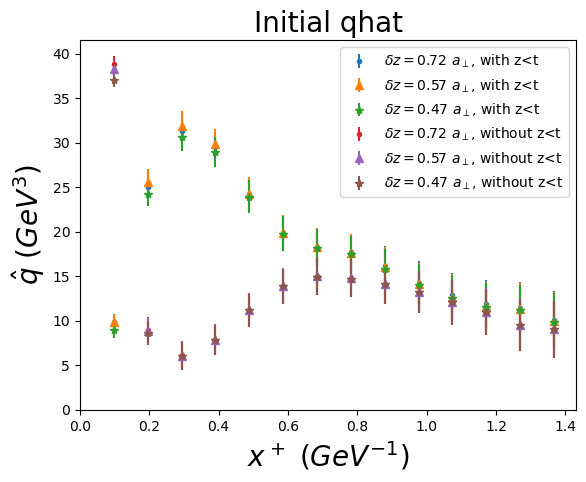

In [32]:
# We plot the results for qhat

plt.errorbar(xplus_q, q1_lc_dat, q1_nolc_sig, fmt='.', label=r'$\delta z = 0.72\ a_\perp$, with z<t')
plt.errorbar(xplus_q, q2_lc_dat, q2_nolc_sig, fmt='^', label=r'$\delta z = 0.57\ a_\perp$, with z<t')
plt.errorbar(xplus_q, q3_lc_dat, q3_nolc_sig, fmt='*', label=r'$\delta z = 0.47\ a_\perp$, with z<t')
plt.errorbar(xplus_q, q1_nolc_dat, q1_nolc_sig, fmt='.', label=r'$\delta z = 0.72\ a_\perp$, without z<t')
plt.errorbar(xplus_q, q2_nolc_dat, q2_nolc_sig, fmt='^', label=r'$\delta z = 0.57\ a_\perp$, without z<t')
plt.errorbar(xplus_q, q3_nolc_dat, q3_nolc_sig, fmt='*', label=r'$\delta z = 0.47\ a_\perp$, without z<t')


plt.xlabel(r'$x^+\ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q}\ (GeV^3)$', fontsize=20)
plt.title('Initial qhat', fontsize=20)

plt.xlim(left=0); plt.ylim(bottom=0)
plt.legend(fontsize=10)

plt.savefig('initial/qhat_combined.png', bbox_inches='tight')

### We compare with the classical results

In [11]:
import numpy as np

p_lc = np.loadtxt('N=256_lc/p_perp2_wz50.txt'); q_lc = np.loadtxt('N=256_lc/qhat_wz50.txt')
p_nolc = np.loadtxt('N=256_nolc/p_perp2_wz50.txt'); q_nolc = np.loadtxt('N=256_nolc/qhat_wz50.txt')
p_class = np.loadtxt('classical_results/momentum_broadening.txt'); q_class = np.loadtxt('classical_results/qhat.txt')

xplus = p_lc[0]; xplus_q = q_lc[0]
p_lc_dat = p_lc[1]/3; p_lc_sig = p_lc[2]/3; q_lc_dat = q_lc[1]/3; q_lc_sig = q_lc[2]/3
p_nolc_dat = p_nolc[1]/3; p_nolc_sig = p_nolc[2]/3; q_nolc_dat = q_nolc[1]/3; q_nolc_sig = q_nolc[2]/3

xplus_class = p_class[0]; xplus_class_q = q_class[0]
p_class_dat = p_class[1]; q_class_dat = q_class[1]

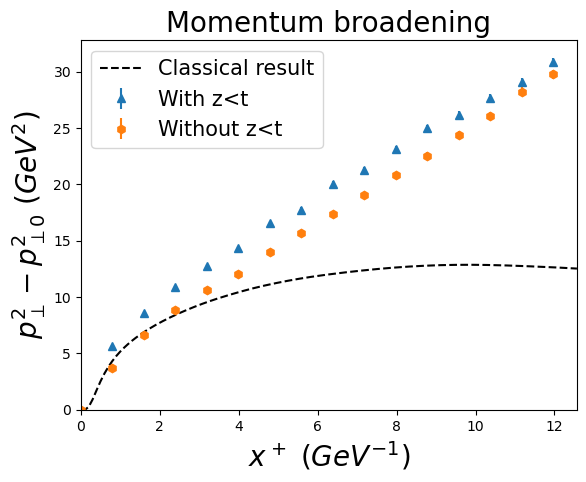

In [12]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, p_lc_dat, p_lc_sig, fmt='^', label='With z<t')
plt.errorbar(xplus, p_nolc_dat, p_nolc_sig, fmt='h', label='Without z<t')
plt.plot(xplus_class, p_class_dat, 'k--', label='Classical result')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

# plt.savefig('sensibility_to_lc/Momentum_broadening.png', bbox_inches='tight')

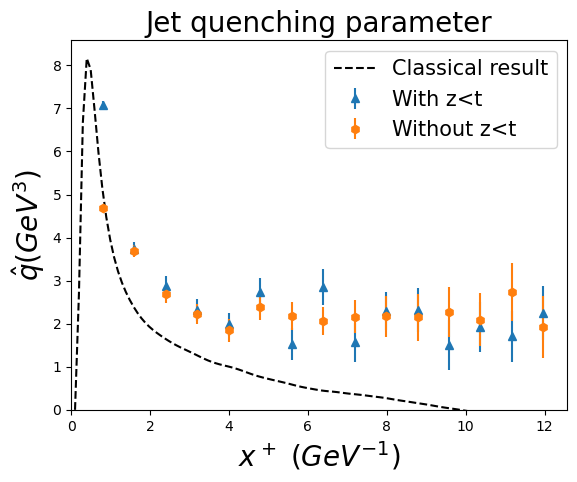

In [13]:
# We plot the qhat

plt.errorbar(xplus_q, q_lc_dat, q_lc_sig, fmt='^', label='With z<t')
plt.errorbar(xplus_q, q_nolc_dat, q_nolc_sig, fmt='h', label='Without z<t')
plt.plot(xplus_class_q, q_class_dat, 'k--', label='Classical result')


plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} (GeV^3)$', fontsize=20)
plt.title('Jet quenching parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

# plt.savefig('sensibility_to_lc/qhat.png', bbox_inches='tight')

### We now do the same for the initial behavior

In [1]:
import numpy as np

p_lc = np.loadtxt('initial/p_perp2_lc_wz50.txt'); q_lc = np.loadtxt('initial/qhat_lc_wz50.txt')
p_nolc = np.loadtxt('initial/p_perp2_nolc_wz50.txt'); q_nolc = np.loadtxt('initial/qhat_nolc_wz50.txt')
p_class = np.loadtxt('classical_results/momentum_broadening_initial.txt'); q_class = np.loadtxt('classical_results/qhat_initial.txt')

xplus = p_lc[0]; xplus_q = q_lc[0]
p_lc_dat = p_lc[1]; p_lc_sig = p_lc[2]; q_lc_dat = q_lc[1]; q_lc_sig = q_lc[2]
p_nolc_dat = p_nolc[1]; p_nolc_sig = p_nolc[2]; q_nolc_dat = q_nolc[1]; q_nolc_sig = q_nolc[2]

xplus_class = p_class[0]; xplus_class_q = q_class[0]
p_class_dat = p_class[1]; q_class_dat = q_class[1]

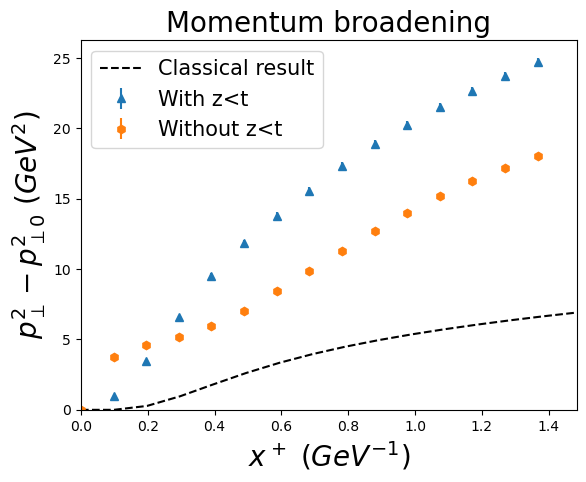

In [2]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, p_lc_dat, p_lc_sig, fmt='^', label='With z<t')
plt.errorbar(xplus, p_nolc_dat, p_nolc_sig, fmt='h', label='Without z<t')
plt.plot(xplus_class, p_class_dat, 'k--', label='Classical result')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

# plt.savefig('initial/Momentum_broadening.png', bbox_inches='tight')

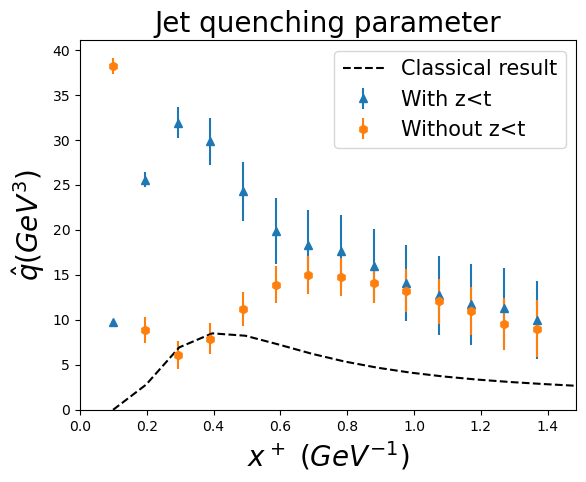

In [3]:
# We plot the qhat

plt.errorbar(xplus_q, q_lc_dat, q_lc_sig, fmt='^', label='With z<t')
plt.errorbar(xplus_q, q_nolc_dat, q_nolc_sig, fmt='h', label='Without z<t')
plt.plot(xplus_class_q, q_class_dat, 'k--', label='Classical result')


plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} (GeV^3)$', fontsize=20)
plt.title('Jet quenching parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

# plt.savefig('initial/qhat.png', bbox_inches='tight')

/tmp/ipykernel_15945/725270509.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_lc = [q_lc_dat[i]/q_class_dat[i] for i in range(len(xplus_q))]
/tmp/ipykernel_15945/725270509.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_lc_sig = [q_lc_sig[i]/q_class_dat[i] for i in range(len(xplus_q))]


<ErrorbarContainer object of 3 artists>

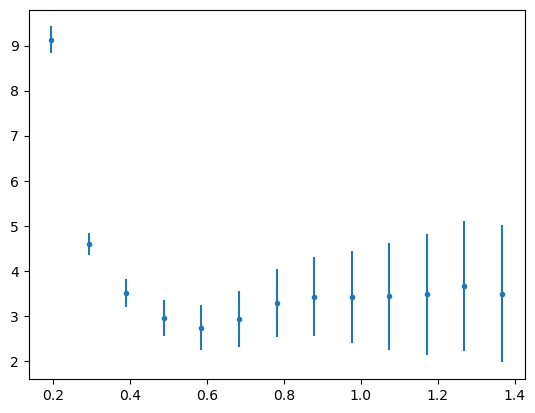

In [11]:
# We plot the ratio of the quantum and classical result

ratio_lc = [q_lc_dat[i]/q_class_dat[i] for i in range(len(xplus_q))]
ratio_lc_sig = [q_lc_sig[i]/q_class_dat[i] for i in range(len(xplus_q))]

plt.errorbar(xplus_q, ratio_lc, ratio_lc_sig, fmt='.')
plt.hlines(3, 0, max(xplus_q))

### We get the anisotropic broadening for every event and then average

In [11]:
# We create a list with the files to read

Nevents = 100
tlist = [0, 16, 32, 48, 64, 80, 96, 112]

file_list = [['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/N=256_nolc/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_50.000000_wy_1.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_6_Nperp_128_Leta_12.669400_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_127/pperp/Pperp_q_t_%i.dat' % (n, t) for t in tlist] for n in range(Nevents)]

In [12]:
# We convert to an array of DataFrames

import pandas as pd 
import numpy as np

df_list = []

for i in range(Nevents):
    df = [pd.read_table(file_list[i][t], header = None) for t in range(len(tlist))]
    df_list.append(df)

data = np.array(df_list)

In [13]:
# We create a vector with the probability of every value of p_y and other for every value of p_z at every time for every event

hbarc = 0.197326 
N = 256
L = 2.5/hbarc
a = L/N

Py = np.array([[[sum(data[n, t, :, y]) for y in range(N)] for t in range(len(tlist))] for n in range(Nevents)])
Pz = np.array([[[sum(data[n, t, z, 0:N]) for z in range(N)] for t in range(len(tlist))] for n in range(Nevents)])

In [14]:
# We compute the value of p^2 associated with every point

p2 = np.array([(n*2*np.pi/L)**2 for n in range (N//2)] + [((n-N)*2*np.pi/L)**2 for n in range(N//2, N)])

In [15]:
# We now multiply the probability by the corresponding value of the momentum squared

py2 = np.array([[[Py[n, t, y]*p2[y] for y in range(N)] for t in range(len(tlist))] for n in range(Nevents)])
pz2 = np.array([[[Pz[n, t, z]*p2[z] for z in range(N)] for t in range(len(tlist))] for n in range(Nevents)])

In [16]:
# We sum all the momentum modes

py2_tot = np.array([[sum(py2[n, t, :]) for t in range(len(tlist))] for n in range(Nevents)])
pz2_tot = np.array([[sum(pz2[n, t, :]) for t in range(len(tlist))] for n in range(Nevents)])

In [17]:
py2_av = [np.average(py2_tot[:,t]) for t in range(len(tlist))]
py2_sig = [np.std(py2_tot[:,t])/np.sqrt(Nevents) for t in range(len(tlist))]

pz2_av = [np.average(pz2_tot[:,t]) for t in range(len(tlist))]
pz2_sig = [np.std(pz2_tot[:,t])/np.sqrt(Nevents) for t in range(len(tlist))]

In [18]:
print(py2_av)
print(py2_sig)

print("################################")

print(pz2_av)
print(pz2_sig)

[0.12272435907875477, 14.866792612209899, 25.822975348395968, 35.679131249375565, 45.371194849395295, 55.59387015612589, 65.91143040427458, 77.30989216101429]
[4.163336342344337e-18, 0.2622295624859301, 0.39539263541211833, 0.5543192641531429, 0.5300879545385654, 0.8410683991113117, 0.9685045041204849, 1.2085231078323007]
################################
[306.171858775334, 311.46137436688946, 312.26875058503356, 312.5622008499209, 313.02188416359127, 313.1650815795816, 313.4433865126898, 313.61259602354227]
[5.684341886080802e-15, 0.11201418678226252, 0.12755258511184941, 0.12722018836907725, 0.14749395510576632, 0.149713578073887, 0.15495718319736215, 0.15064011915293313]


In [19]:
# We subtract the initial momentum to every other

py2_dif = [py2_av[t]-py2_av[0] for t in range(len(tlist))]
pz2_dif = [pz2_av[t]-pz2_av[0] for t in range (len(tlist))]

# We compute xplus

xplus = [2*a*t for t in (tlist)]

# And compute the qhat

qy = np.diff(py2_av)/np.diff(xplus)
qz = np.diff(pz2_av)/np.diff(xplus)

# And the uncertainty of qhat

qy_sig = [np.sqrt((py2_sig[i]/(xplus[i]-xplus[i-1]))**2 + (py2_sig[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(py2_sig))]
qz_sig = [np.sqrt((pz2_sig[i]/(xplus[i]-xplus[i-1]))**2 + (pz2_sig[i-1]/(xplus[i]-xplus[i-1]))**2) for i in range(1, len(pz2_sig))]


In [20]:
# We save to file

np.savetxt('Jets in Glasma Results/anisotropic_python/p_perp2_LC.txt', [xplus, py2_dif, pz2_dif, py2_sig, pz2_sig], fmt='%f')
np.savetxt('Jets in Glasma Results/anisotropic_python/qhat_LC.txt', [xplus[1:len(xplus)], qy, qz, qy_sig, qz_sig], fmt='%f')

### We plot the anisotropic results

In [21]:
import numpy as np

p_lc = np.loadtxt('Jets in Glasma Results/anisotropic_python/p_perp2_LC.txt'); q_lc = np.loadtxt('Jets in Glasma Results/anisotropic_python/qhat_LC.txt')
p_temp = np.loadtxt('Jets in Glasma Results/anisotropic_python/p_perp2_temp.txt'); q_temp = np.loadtxt('Jets in Glasma Results/anisotropic_python/qhat_temp.txt')
p_class = np.loadtxt('classical_results/anisotropic_momentum_broadening.txt'); q_class = np.loadtxt('classical_results/anisotropic_qhat.txt')

xplus = p_lc[0]; xplus_q = xplus[1:len(xplus)]

py2_lc = p_lc[1]; pz2_lc = p_lc[2]; py2_lc_sig = p_lc[3]; pz2_lc_sig = p_lc[4]
qy_lc = q_lc[1]; qz_lc = q_lc[2]; qy_lc_sig = q_lc[3]; qz_lc_sig = q_lc[4]

py2_temp = p_temp[1]; pz2_temp = p_temp[2]; py2_temp_sig = p_temp[3]; pz2_temp_sig = p_temp[4]
qy_temp = q_temp[1]; qz_temp = q_temp[2]; qy_temp_sig = q_temp[3]; qz_temp_sig = q_temp[4]

xplus_class = p_class[0]; xplus_class_q = q_class[0]
py2_class = p_class[1]; pz2_class = p_class[2]
qy_class = q_class[1]; qz_class = q_class[2]


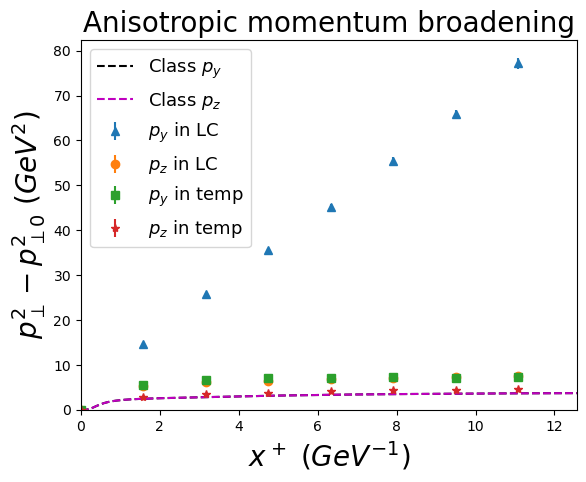

In [37]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, py2_lc, py2_lc_sig, fmt='^', label=r'$p_y$ in LC')
plt.errorbar(xplus, pz2_lc, pz2_lc_sig, fmt='o', label=r'$p_z$ in LC')
plt.errorbar(xplus, py2_temp, py2_temp_sig, fmt='s', label=r'$p_y$ in temp')
plt.errorbar(xplus, pz2_temp, pz2_temp_sig, fmt='*', label=r'$p_z$ in temp')

plt.plot(xplus_class, py2_class, 'k--', label=r'Class $p_y$')
plt.plot(xplus_class, py2_class, 'm--', label=r'Class $p_z$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Anisotropic momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=13)

plt.savefig('Jets in Glasma Results/anisotropic_python/Momentum_broadening.png', bbox_inches='tight')

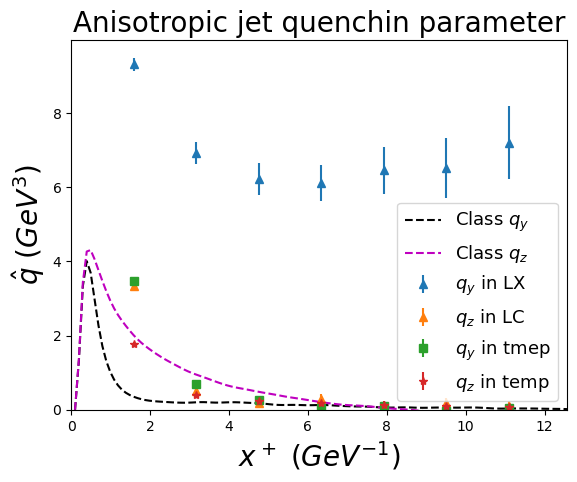

In [40]:
# We plot the qhat

import matplotlib.pyplot as plt

plt.errorbar(xplus_q, qy_lc, qy_lc_sig, fmt='^', label=r'$q_y$ in LX')
plt.errorbar(xplus_q, qz_lc, qz_lc_sig, fmt='^', label=r'$q_z$ in LC')
plt.errorbar(xplus_q, qy_temp, qy_temp_sig, fmt='s', label=r'$q_y$ in tmep')
plt.errorbar(xplus_q, qz_temp, qz_temp_sig, fmt='*', label=r'$q_z$ in temp')

plt.plot(xplus_class_q, qy_class, 'k--', label=r'Class $q_y$')
plt.plot(xplus_class_q, qz_class, 'm--', label=r'Class $q_z$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} \ (GeV^3)$', fontsize=20)
plt.title('Anisotropic jet quenchin parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=13)

plt.savefig('Jets in Glasma Results/anisotropic_python/qhat.png', bbox_inches='tight')

In [34]:
# We check in the sum gives the same

p_tot = [py2_temp[t] + pz2_temp[t] for t in range(len(tlist))]
dat = np.loadtxt('Jets in Glasma Results/temp_gauge/p_perp2.txt')
p_comp = dat[1]; x2 = dat[0]


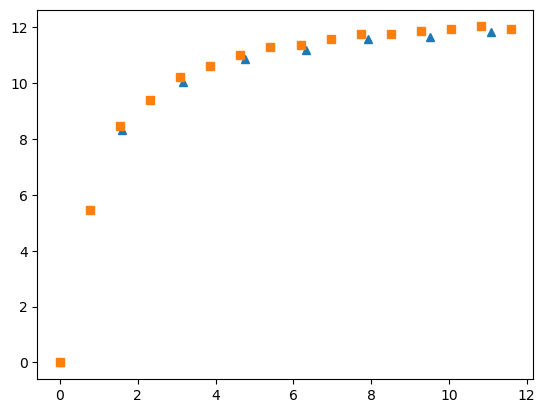

In [35]:
plt.plot(xplus, p_tot, '^')
plt.plot(x2, p_comp, 's')

### We repeat the proceeding only for the initial points

In [136]:
# We create a list with the files to read

N = 100

file_list = ['/lustre/HQCD/carlos.lamas/qJetLFH_v3/output/init_nolc/result_%i_OUTPUT_VGlasma_nophase_R_q_g_1.000_WF_Init_q_Gaussian_nPx0_nPy0_wx_50.000000_wy_1.000000_cQ_1_hQ_1_mq0_4.200_mq_4.200_mg_0.150_Lperp_6_Nperp_128_Leta_1.464800_Neta_1_Lmin_10.00_Kmax_2_g2mu_0.000_onMPIrank_0_step_15/pperp/Pperp_q_t_14.dat' % n for n in range(N)]

In [138]:
import pandas as pd 

df_list = []
for i in range(N):
    df = pd.read_table(file_list[i], header = None)
    df_list.append(df)

In [139]:
# We compute the average p_perp and the deviation at every time step

import numpy as np 

Nperp = 256

s = np.array(df_list)
        
p_prob = [[np.average(s[:, j, k]) for k in range(Nperp)] for j in range(Nperp)]

In [140]:
np.savetxt('anisotropic/initial_nolc_t14.dat', p_prob, fmt='%f')

In [8]:
import numpy as np

p_lc = np.loadtxt('anisotropic/p2_perp_lc_initial.txt'); p_nolc = np.loadtxt('anisotropic/p2_perp_nolc_initial.txt')
p_class = np.loadtxt('classical_results/anisotropic_momentum_broadening_initial.txt'); q_class = np.loadtxt('classical_results/anisotropic_qhat_initial.txt')

xplus = p_lc[0]; xplus_q = xplus[1:len(xplus)]
p_lc_y_pre = p_lc[1]/3; p_lc_z_pre = p_lc[2]/2
p_nolc_y_pre = p_nolc[1]/3; p_nolc_z_pre = p_nolc[2]/3

p_lc_y = [p_lc_y_pre[i]-p_lc_y_pre[0] for i in range(len(p_lc_y_pre))]
p_lc_z = [p_lc_z_pre[i]-p_lc_z_pre[0] for i in range(len(p_lc_z_pre))]
p_nolc_y = [p_nolc_y_pre[i]-p_nolc_y_pre[0] for i in range(len(p_nolc_y_pre))]
p_nolc_z = [p_nolc_z_pre[i]-p_nolc_z_pre[0] for i in range(len(p_nolc_z_pre))]

q_lc_y = np.diff(p_lc_y)/np.diff(xplus); q_lc_z = np.diff(p_lc_z)/np.diff(xplus)
q_nolc_y = np.diff(p_nolc_y)/np.diff(xplus); q_nolc_z = np.diff(p_nolc_z)/np.diff(xplus)

xplus_class = p_class[0]; xplus_class_q = q_class[0]
p_class_y = p_class[1]; p_class_z = p_class[2]
q_class_y = q_class[1]; q_class_z = q_class[2]

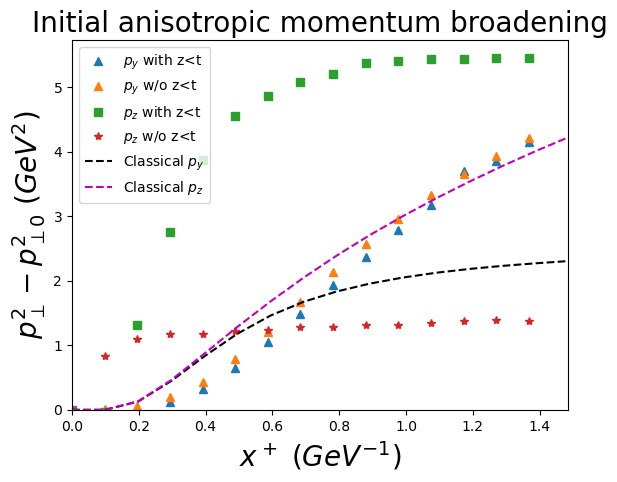

In [9]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.plot(xplus, p_lc_y, '^', label=r'$p_y$ with z<t')
plt.plot(xplus, p_nolc_y, '^', label=r'$p_y$ w/o z<t')
plt.plot(xplus, p_lc_z, 's', label=r'$p_z$ with z<t')
plt.plot(xplus, p_nolc_z,'*', label=r'$p_z$ w/o z<t')

plt.plot(xplus_class, p_class_y, 'k--', label=r'Classical $p_y$')
plt.plot(xplus_class, p_class_z, 'm--', label=r'Classical $p_z$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Initial anisotropic momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=10)

# plt.savefig('anisotropic/initial_momentum_broadening.png', bbox_inches='tight')

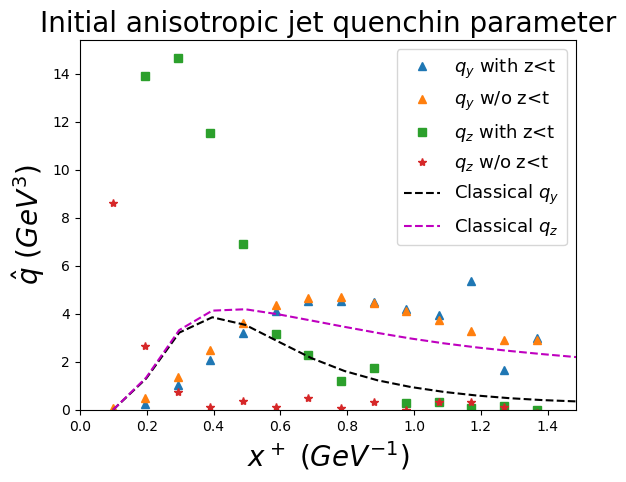

In [10]:
# We plot the qhat

import matplotlib.pyplot as plt

plt.plot(xplus_q, q_lc_y, '^', label=r'$q_y$ with z<t')
plt.plot(xplus_q, q_nolc_y, '^', label=r'$q_y$ w/o z<t')
plt.plot(xplus_q, q_lc_z, 's', label=r'$q_z$ with z<t')
plt.plot(xplus_q, q_nolc_z,'*', label=r'$q_z$ w/o z<t')

plt.plot(xplus_class_q, q_class_y, 'k--', label=r'Classical $q_y$')
plt.plot(xplus_class_q, q_class_z, 'm--', label=r'Classical $q_z$')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} \ (GeV^3)$', fontsize=20)
plt.title('Initial anisotropic jet quenchin parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=13)

# plt.savefig('anisotropic/qhat_initial.png', bbox_inches='tight')

### We compare the results for the transformed and untransformed fields together with the classical result

In [15]:
p_lc = np.loadtxt('Jets in Glasma Results/N=256_nolc/p_perp2_wz50.txt'); q_lc = np.loadtxt('Jets in Glasma Results/N=256_nolc/qhat_wz50.txt')
p_temp = np.loadtxt('Jets in Glasma Results/temp_gauge/p_perp2.txt'); q_temp = np.loadtxt('Jets in Glasma Results/temp_gauge/qhat.txt')
p_class = np.loadtxt('Jets in Glasma Results/classical_results/momentum_broadening.txt'); q_class = np.loadtxt('Jets in Glasma Results/classical_results/qhat.txt')

xplus = p_lc[0]; xplus_q = q_lc[0]
p_lc_dat = p_lc[1]; p_lc_sig = p_lc[2]; q_lc_dat = q_lc[1]; q_lc_sig = q_lc[2]
p_temp_dat = p_temp[1]; p_temp_sig = p_temp[2]; q_temp_dat = q_temp[1]; q_temp_sig = q_temp[2]

xplus_class = p_class[0]; xplus_class_q = q_class[0]
p_class_dat = p_class[1]; q_class_dat = q_class[1]

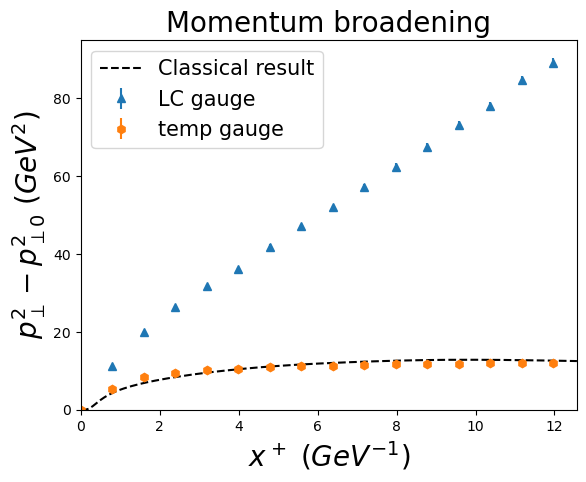

In [16]:
# We plot the momentum broadening

import matplotlib.pyplot as plt

plt.errorbar(xplus, p_lc_dat, p_lc_sig, fmt='^', label='LC gauge')
plt.errorbar(xplus, p_temp_dat, p_temp_sig, fmt='h', label='temp gauge')
plt.plot(xplus_class, p_class_dat, 'k--', label='Classical result')

plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$p_\perp^2 - p_{\perp 0}^2 \ (GeV^2)$', fontsize=20)
plt.title('Momentum broadening', fontsize=20)

plt.xlim(0, max(xplus_class)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/temp_gauge/Momentum_broadening_compare.png', bbox_inches='tight')

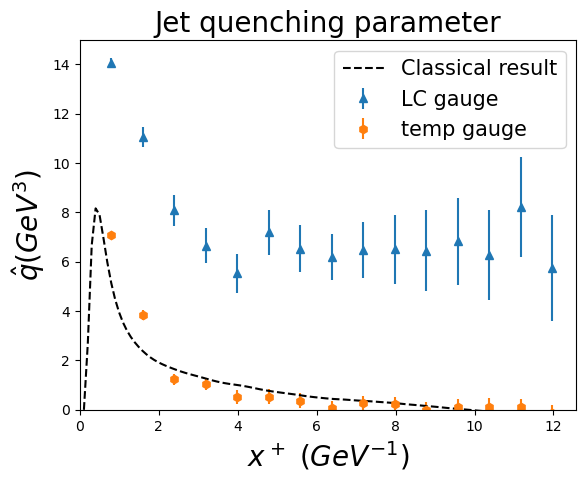

In [19]:
# We plot the qhat

plt.errorbar(xplus_q, q_lc_dat, q_lc_sig, fmt='^', label='LC gauge')
plt.errorbar(xplus_q, q_temp_dat, q_temp_sig, fmt='h', label='temp gauge')
plt.plot(xplus_class_q, q_class_dat, 'k--', label='Classical result')


plt.xlabel(r'$x^+ \ (GeV^{-1})$', fontsize=20); plt.ylabel(r'$\hat{q} (GeV^3)$', fontsize=20)
plt.title('Jet quenching parameter', fontsize=20)

plt.xlim(0, max(xplus_class_q)); plt.ylim(bottom=0)
plt.legend(fontsize=15)

plt.savefig('Jets in Glasma Results/temp_gauge/qhat_compare.png', bbox_inches='tight')